In [5]:
import autograd.numpy as np
from autograd import grad, jacobian
from scipy.optimize import minimize
import copy
from model_simplify import create_ploy_basis_file, find_cq
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

np.random.seed(1)

dimension = 24

# specify x
num_points = 20000
x = np.random.normal(0,1,(dimension,num_points))

# load basis file
create_ploy_basis_file(orders=[1,2,3], num_variable=dimension, path="./basis.txt")
bases = np.loadtxt('./basis.txt', dtype='str')

def f(x):
    
    xdot = np.zeros((dimension, x.shape[1]))
    
    lamda=(x[0]*(-x[9]*x[17]+x[9]*x[23]+x[15]*x[11]-x[15]*x[23]-x[21]*x[11]+x[21]*x[17])+x[2]*(x[17]*x[7]-x[23]*x[7]-x[11]*x[13]+x[23]*x[13]+x[11]*x[19]-x[17]*x[19])+x[4]*(-x[7]*x[15]+x[7]*x[21]+x[13]*x[9]-x[13]*x[21]-x[19]*x[9]+x[19]*x[15])+x[6]*(x[3]*x[17]-x[3]*x[23]-x[15]*x[5]+x[15]*x[23]+x[21]*x[5]-x[21]*x[17])+x[8]*(-x[17]*x[1]+x[23]*x[1]+x[5]*x[13]-x[23]*x[13]-x[5]*x[19]+x[17]*x[19])+x[10]*(x[1]*x[15]-x[1]*x[21]-x[13]*x[3]+x[13]*x[21]+x[19]*x[3]-x[19]*x[15])+x[12]*(-x[3]*x[11]+x[3]*x[23]+x[9]*x[5]-x[9]*x[23]-x[21]*x[5]+x[21]*x[11])+x[14]*(x[11]*x[1]-x[23]*x[1]-x[5]*x[7]+x[23]*x[7]+x[5]*x[19]-x[11]*x[19])+x[16]*(-x[1]*x[9]+x[1]*x[21]+x[7]*x[3]-x[7]*x[21]-x[19]*x[3]+x[19]*x[9])+x[18]*(x[3]*x[11]-x[3]*x[17]-x[9]*x[5]+x[9]*x[17]+x[15]*x[5]-x[15]*x[11])+x[20]*(-x[11]*x[1]+x[17]*x[1]+x[5]*x[7]-x[17]*x[7]-x[5]*x[13]+x[11]*x[13])+x[22]*(x[1]*x[9]-x[1]*x[15]-x[7]*x[3]+x[7]*x[15]+x[13]*x[3]-x[13]*x[9]))/(x[20]**2*x[4]*x[16]+x[0]*x[18]*x[10]**2+x[8]*x[20]*x[16]**2+x[12]*x[18]*x[2]**2+x[2]*x[8]*x[16]**2+x[14]**2*x[4]*x[10]+x[0]*x[6]*x[14]**2+x[6]**2*x[4]*x[16]+x[0]*x[12]*x[10]**2+x[2]*x[14]*x[10]**2+x[0]*x[6]*x[16]**2+x[12]**2*x[4]*x[10]+x[8]**2*x[4]*x[16]+x[0]**2*x[10]*x[16]+x[8]*x[14]*x[4]**2+x[6]*x[12]*x[4]**2+x[0]*x[12]*x[8]**2+x[2]**2*x[10]*x[16]+x[6]**2*x[2]*x[14]+2*x[2]*x[8]*x[4]*x[10]-x[2]*x[8]*x[4]*x[16]-x[2]*x[8]*x[10]*x[16]-x[2]*x[14]*x[4]*x[10]+2*x[2]*x[14]*x[4]*x[16]-x[2]*x[14]*x[10]*x[16]-x[8]*x[14]*x[4]*x[10]-x[8]*x[14]*x[4]*x[16]+2*x[8]*x[14]*x[10]*x[16]-x[0]*x[6]*x[2]*x[14]-x[0]*x[6]*x[8]*x[14]+2*x[0]*x[6]*x[4]*x[10]-x[0]*x[6]*x[4]*x[16]-x[0]*x[6]*x[10]*x[16]-x[0]*x[12]*x[2]*x[8]+2*x[0]*x[12]*x[2]*x[14]-x[0]*x[12]*x[8]*x[14]-x[0]*x[12]*x[4]*x[10]+2*x[0]*x[12]*x[4]*x[16]-x[0]*x[12]*x[10]*x[16]-x[6]*x[12]*x[2]*x[8]-x[6]*x[12]*x[2]*x[14]+2*x[6]*x[12]*x[8]*x[14]-x[6]*x[12]*x[4]*x[10]-x[6]*x[12]*x[4]*x[16]+2*x[6]*x[12]*x[10]*x[16]-x[0]**2*x[8]**2-x[0]**2*x[14]**2-x[0]**2*x[10]**2-x[0]**2*x[16]**2-x[6]**2*x[2]**2-x[6]**2*x[14]**2-x[6]**2*x[4]**2-x[6]**2*x[16]**2-x[12]**2*x[2]**2-x[12]**2*x[8]**2-x[12]**2*x[4]**2-x[12]**2*x[10]**2-x[2]**2*x[10]**2-x[2]**2*x[16]**2-x[8]**2*x[4]**2-x[8]**2*x[16]**2-x[14]**2*x[4]**2-x[14]**2*x[10]**2-x[0]*x[6]*x[2]*x[20]-x[0]*x[6]*x[8]*x[20]-x[0]*x[6]*x[4]*x[22]-x[0]*x[6]*x[10]*x[22]-x[0]*x[12]*x[2]*x[20]-x[0]*x[12]*x[14]*x[20]-x[0]*x[12]*x[4]*x[22]-x[0]*x[12]*x[16]*x[22]-x[0]*x[18]*x[2]*x[8]-x[0]*x[18]*x[2]*x[14]+2*x[0]*x[18]*x[2]*x[20]-x[0]*x[18]*x[8]*x[20]-x[0]*x[18]*x[14]*x[20]-x[0]*x[18]*x[4]*x[10]-x[0]*x[18]*x[4]*x[16]+2*x[0]*x[18]*x[4]*x[22]-x[0]*x[18]*x[10]*x[22]-x[0]*x[18]*x[16]*x[22]-x[6]*x[12]*x[8]*x[20]-x[6]*x[12]*x[14]*x[20]-x[6]*x[12]*x[10]*x[22]-x[6]*x[12]*x[16]*x[22]-x[6]*x[18]*x[2]*x[8]-x[6]*x[18]*x[2]*x[20]-x[6]*x[18]*x[8]*x[14]+2*x[6]*x[18]*x[8]*x[20]-x[6]*x[18]*x[14]*x[20]+x[0]**2*x[8]*x[14]+x[12]**2*x[2]*x[8]+x[6]*x[12]*x[2]**2+2*x[0]*x[6]*x[2]*x[8]+x[0]**2*x[16]*x[22]+x[14]*x[20]*x[4]**2+x[12]**2*x[10]*x[22]+x[6]*x[12]*x[22]**2+x[6]**2*x[4]*x[22]+x[8]*x[14]*x[22]**2+x[6]*x[18]*x[4]**2+x[12]**2*x[8]*x[20]+x[18]**2*x[2]*x[14]+x[12]*x[18]*x[10]**2+x[0]*x[6]*x[20]**2+x[6]*x[18]*x[16]**2+x[2]*x[8]*x[22]**2+x[2]*x[20]*x[10]**2+x[18]**2*x[10]*x[16]+x[12]**2*x[4]*x[22]+x[0]**2*x[14]*x[20]+x[6]**2*x[2]*x[20]+x[8]**2*x[16]*x[22]+x[8]*x[20]*x[4]**2+x[6]*x[18]*x[2]**2+x[0]*x[18]*x[14]**2+x[0]**2*x[8]*x[20]+x[2]*x[20]*x[16]**2+x[2]**2*x[10]*x[22]+x[14]**2*x[10]*x[22]+x[18]**2*x[4]*x[10]+x[20]**2*x[10]*x[16]+x[6]**2*x[14]*x[20]+x[20]**2*x[4]*x[10]+x[0]*x[12]*x[20]**2+x[18]**2*x[2]*x[8]+x[0]**2*x[10]*x[22]+x[0]*x[18]*x[8]**2+x[18]**2*x[4]*x[16]+x[6]*x[18]*x[14]**2+x[0]*x[6]*x[22]**2+x[14]*x[20]*x[10]**2+x[2]**2*x[16]*x[22]+x[6]**2*x[16]*x[22]+x[14]**2*x[4]*x[22]+x[12]*x[18]*x[4]**2+x[18]**2*x[8]*x[14]+x[12]**2*x[2]*x[20]+x[8]**2*x[4]*x[22]+x[6]*x[12]*x[20]**2+x[12]*x[18]*x[8]**2+x[0]*x[18]*x[16]**2+x[0]*x[12]*x[22]**2-x[0]**2*x[20]**2-x[0]**2*x[22]**2-x[6]**2*x[20]**2-x[6]**2*x[22]**2-x[12]**2*x[20]**2-x[12]**2*x[22]**2-x[18]**2*x[2]**2-x[18]**2*x[8]**2-x[18]**2*x[14]**2-x[18]**2*x[4]**2-x[18]**2*x[10]**2-x[18]**2*x[16]**2-x[2]**2*x[22]**2-x[8]**2*x[22]**2-x[14]**2*x[22]**2-x[20]**2*x[4]**2-x[20]**2*x[10]**2-x[20]**2*x[16]**2+x[2]*x[14]*x[22]**2-x[6]*x[18]*x[4]*x[10]-x[6]*x[18]*x[4]*x[22]-x[6]*x[18]*x[10]*x[16]+2*x[6]*x[18]*x[10]*x[22]-x[6]*x[18]*x[16]*x[22]-x[12]*x[18]*x[2]*x[14]-x[12]*x[18]*x[2]*x[20]-x[12]*x[18]*x[8]*x[14]-x[12]*x[18]*x[8]*x[20]+2*x[12]*x[18]*x[14]*x[20]-x[12]*x[18]*x[4]*x[16]-x[12]*x[18]*x[4]*x[22]-x[12]*x[18]*x[10]*x[16]-x[12]*x[18]*x[10]*x[22]+2*x[12]*x[18]*x[16]*x[22]-x[2]*x[8]*x[4]*x[22]-x[2]*x[8]*x[10]*x[22]-x[2]*x[14]*x[4]*x[22]-x[2]*x[14]*x[16]*x[22]-x[2]*x[20]*x[4]*x[10]-x[2]*x[20]*x[4]*x[16]+2*x[2]*x[20]*x[4]*x[22]-x[2]*x[20]*x[10]*x[22]-x[2]*x[20]*x[16]*x[22]-x[8]*x[14]*x[10]*x[22]-x[8]*x[14]*x[16]*x[22]-x[8]*x[20]*x[4]*x[10]-x[8]*x[20]*x[4]*x[22]-x[8]*x[20]*x[10]*x[16]+2*x[8]*x[20]*x[10]*x[22]-x[8]*x[20]*x[16]*x[22]-x[14]*x[20]*x[4]*x[16]-x[14]*x[20]*x[4]*x[22]-x[14]*x[20]*x[10]*x[16]-x[14]*x[20]*x[10]*x[22]+2*x[14]*x[20]*x[16]*x[22]);

    xdot[0]=x[1];
    xdot[1]=lamda*(-x[14]*x[22]+x[14]*x[10]+x[20]*x[16]-x[10]*x[20]-x[16]*x[8]+x[8]*x[22]);
    xdot[2]=x[3];
    xdot[3]=lamda*(x[6]*x[16]-x[18]*x[16]-x[6]*x[22]+x[12]*x[22]-x[10]*x[12]+x[10]*x[18]);
    xdot[4]=x[5];
    xdot[5]=lamda*(-x[6]*x[14]+x[6]*x[20]+x[14]*x[18]-x[12]*x[20]+x[8]*x[12]-x[18]*x[8]);
    xdot[6]=x[7];
    xdot[7]=lamda*(x[16]*x[2]-x[2]*x[22]-x[4]*x[14]+x[14]*x[22]+x[20]*x[4]-x[20]*x[16]);
    xdot[8]=x[9];
    xdot[9]=lamda*(-x[16]*x[0]+x[0]*x[22]+x[4]*x[12]-x[12]*x[22]-x[4]*x[18]+x[18]*x[16]);
    xdot[10]=x[11];
    xdot[11]=lamda*(x[14]*x[0]-x[0]*x[20]-x[2]*x[12]+x[12]*x[20]+x[2]*x[18]-x[14]*x[18]);
    xdot[12]=x[13];
    xdot[13]=lamda*(-x[2]*x[10]+x[2]*x[22]+x[4]*x[8]-x[8]*x[22]-x[20]*x[4]+x[10]*x[20]);
    xdot[14]=x[15];
    xdot[15]=lamda*(x[10]*x[0]-x[0]*x[22]-x[6]*x[4]+x[6]*x[22]+x[4]*x[18]-x[10]*x[18]);
    xdot[16]=x[17];
    xdot[17]=lamda*(-x[8]*x[0]+x[0]*x[20]+x[6]*x[2]-x[6]*x[20]-x[2]*x[18]+x[18]*x[8]);
    xdot[18]=x[19];
    xdot[19]=lamda*(x[2]*x[10]-x[16]*x[2]-x[4]*x[8]+x[16]*x[8]+x[4]*x[14]-x[14]*x[10]);
    xdot[20]=x[21];
    xdot[21]=lamda*(-x[10]*x[0]+x[16]*x[0]+x[6]*x[4]-x[6]*x[16]-x[4]*x[12]+x[10]*x[12]);
    xdot[22]=x[23];
    xdot[23]=lamda*(x[8]*x[0]-x[14]*x[0]-x[6]*x[2]+x[6]*x[14]+x[2]*x[12]-x[8]*x[12]);

    xdot = xdot/np.linalg.norm(xdot, axis=0)[np.newaxis, :]
    return xdot




def get_data(data_size):
    x = np.random.normal(0,1,(dimension, num_points))
    x[23] = -((-x[14]*x[22] + x[14]*x[10] + x[20]*x[16] - x[10]*x[20] - x[16]*x[8] + x[8]*x[22])*x[1] + (x[6]*x[16] - x[18]*x[16] - x[6]*x[22] + x[12]*x[22] - x[10]*x[12] + x[10]*x[18])*x[3] + (-x[6]*x[14] + x[6]*x[20] + x[14]*x[18] - x[12]*x[20] + x[8]*x[12] - x[18]*x[8])*x[5] + (x[16]*x[2] - x[2]*x[22] - x[4]*x[14] + x[14]*x[22] + x[20]*x[4] - x[20]*x[16])*x[7] + (-x[16]*x[0] + x[0]*x[22] + x[4]*x[12] - x[12]*x[22] - x[4]*x[18] + x[18]*x[16])*x[9] + (x[14]*x[0] - x[0]*x[20] - x[2]*x[12] + x[12]*x[20] + x[2]*x[18] - x[14]*x[18])*x[11] + (-x[2]*x[10] + x[2]*x[22] + x[4]*x[8] - x[8]*x[22] - x[20]*x[4] + x[10]*x[20])*x[13] + (x[10]*x[0] - x[0]*x[22] - x[6]*x[4] + x[6]*x[22] + x[4]*x[18] - x[10]*x[18])*x[15] + (-x[8]*x[0] + x[0]*x[20] + x[6]*x[2] - x[6]*x[20] - x[2]*x[18] + x[18]*x[8])*x[17] + (x[2]*x[10] - x[16]*x[2] - x[4]*x[8] + x[16]*x[8] + x[4]*x[14] - x[14]*x[10])*x[19] + (-x[10]*x[0] + x[16]*x[0] + x[6]*x[4] - x[6]*x[16] - x[4]*x[12] + x[10]*x[12])*x[21])/(x[8]*x[0] - x[14]*x[0] - x[6]*x[2] + x[6]*x[14] + x[2]*x[12] - x[8]*x[12]);
    return x

x = get_data(num_points)



In [ ]:
tol_cq = 1e-11
tol_dep = 1e-4
results = find_cq(f, x, bases, tol_cq=tol_cq, tol_dep=tol_dep, sparse_run=1, max_iter=0)

#### Computing bases and gradients #####
#### Solving thetas ####
#### Skip sparsifying thetas ####
#### Selecting independent CQs ####


Text(0, 0.5, 'singulvar value $\\sigma_i$')

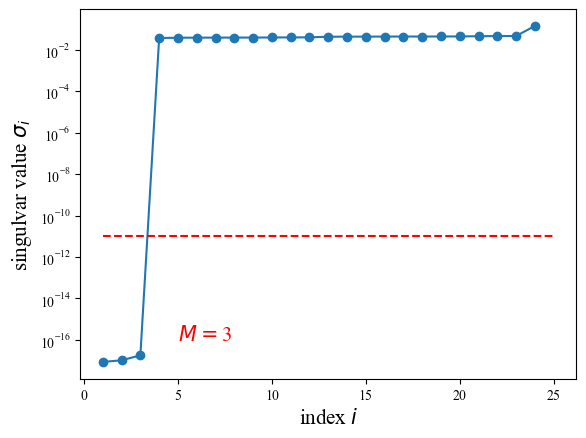

In [3]:
s_cq = results['s_cq'][::-1]
n_cq_dep = np.sum(s_cq<tol_cq)
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]+1],[tol_cq, tol_cq], ls="--",color="red")
#plt.plot([1, s_cq.shape[0]+1],[tol_cq*0.1, tol_cq*0.1], ls="--",color="green")
plt.text(5,1e-16,r"$M=$"+"{}".format(n_cq_dep),fontsize=15,color="red")
plt.yscale('log')
#plt.xticks(np.arange(s_cq.shape[0])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)

Text(0, 0.5, 'singulvar value $s_i$')

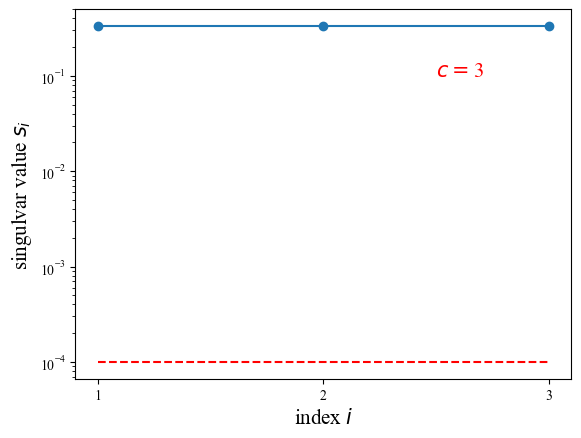

In [4]:
S = results['s_cq_independent']
n_cq_indep = np.sum(np.mean(S, axis=0)>tol_dep)
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
plt.text(2.5,1e-1,r"$c=$"+"{}".format(n_cq_indep),fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)

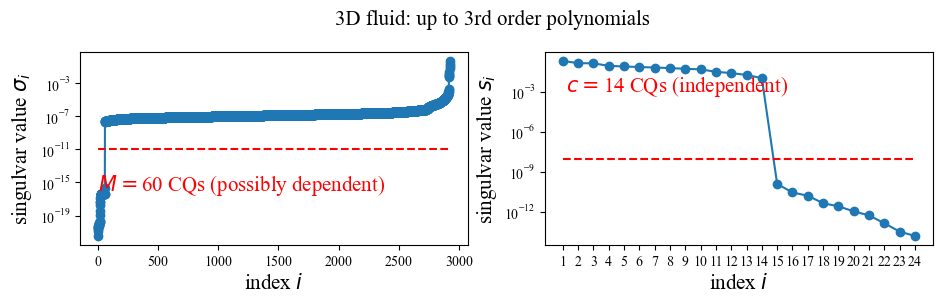

In [19]:
plt.figure(figsize=(11,2.5))

plt.subplot(1,2,1)

s_cq = results['s_cq'][::-1]
plt.plot(np.arange(s_cq.shape[0])+1,s_cq,marker="o")
plt.plot([1, s_cq.shape[0]+1],[tol_cq, tol_cq], ls="--",color="red")
plt.text(2,1e-16,r"$M=$"+"{}".format(n_cq_dep)+" CQs (possibly dependent)",fontsize=15,color="red")
plt.yscale('log')
#plt.xticks(np.arange(s_cq.shape[0])+1);
#plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$\sigma_i$", fontsize=15)
plt.xlabel('index '+r"$i$", fontsize=15)

plt.subplot(1,2,2)
S = results['s_cq_independent']
plt.plot(np.arange(S.shape[1])+1,np.mean(S, axis=0),marker="o")
plt.plot([1, S.shape[1]],[tol_dep, tol_dep], ls="--",color="red")
plt.text(1.2,1e-3,r"$c=$"+"{}".format(n_cq_indep)+" CQs (independent)",fontsize=15,color="red")
plt.yscale('log')
plt.xticks(np.arange(S.shape[1])+1);
plt.xlabel('index '+r"$i$", fontsize=15)
plt.ylabel('singulvar value '+r"$s_i$", fontsize=15)

plt.suptitle('3D fluid: up to 3rd order polynomials', fontsize=15, y=1.05)

plt.savefig('./fig/fluid_3D_3poly_sv.pdf', bbox_inches="tight")

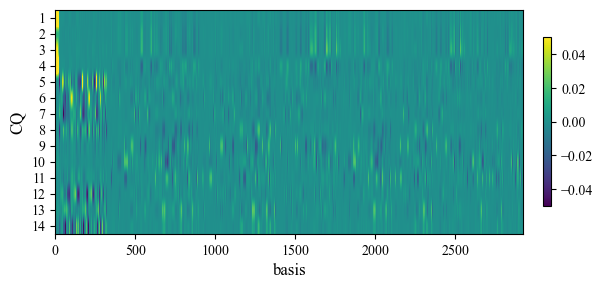

In [7]:
sols = results['sol_cq_independent']
plt.yticks(np.arange(n_cq_indep),np.arange(n_cq_indep)+1)

#plt.set_title(r'$\Theta^{(3)}$',fontsize=15)
plt.xlabel("basis",fontsize=12)
plt.ylabel("CQ",fontsize=12)
#plt.xticks(np.arange(11), ticks)
im = plt.imshow(sols, vmin=-0.05, vmax=0.05, aspect=100)
plt.colorbar(fraction=0.017, pad=0.04)
plt.savefig('./fig/fluid_3D_CQ.pdf', bbox_inches="tight")

In [1]:
# 3D : 4 poly


import autograd.numpy as np
from autograd import grad, jacobian
from scipy.optimize import minimize
import copy


def create_ploy_basis_file(orders, num_variable, path="./basis.txt"):

    def _create_poly_basis(order, num_variable):
        order = order
        num = num_variable
        content = []
        for i in range(order):
            content.append(np.arange(num))
        #content = [[0,1,2,3,4],[0,1,2,3,4],[0,1,2,3,4]]
        basis = np.transpose(np.array(np.meshgrid(*content)).reshape(order, num**order))
        basis = np.sort(basis, axis=1)
        #basis
        basis = np.array(list(set(tuple(map(tuple, basis)))))
        index = np.sum(num**np.arange(order)[::-1][np.newaxis,:]*basis, axis=1)
        basis = basis[np.argsort(index)]
        return basis
    
    basis_string = []
    
    for order in orders:
        basis = _create_poly_basis(order, num_variable)
        for j in range(basis.shape[0]):
            string = ""
            for i in range(order):
                if i == 0:
                    string += "x[%d]"%(basis[j][i])
                else:
                    string += "*x[%d]"%(basis[j][i])
            basis_string.append(string)
                
    np.savetxt(path, np.array(basis_string), fmt="%s")
    
    
def find_cq(f, x, bases, tol_cq=1e-4, tol_dep=1e-4, seed=0):

    results = {}
    np.random.seed(seed)
    # generate data (computing the basis)
    num_basis = bases.shape[0]
    num_points = x.shape[1]
    assert num_points >= num_basis
    basis_data = []
    grad_data = []

    #### Computing bases and gradients #####
    print("#### Computing bases and gradients #####")
    for i in range(num_basis):
        basis_data.append(eval(bases[i]))
        def bases_sum(x):
            return np.sum(eval(bases[i]))
        batch_grad = grad(bases_sum)
        grad_data.append(batch_grad(x))

    basis_data = np.transpose(np.array(basis_data))
    grad_data = np.transpose(np.array(grad_data))

    f_data = np.transpose(f(x))

    f_grad_prod = np.einsum('ij,ijk->ik', f_data, grad_data)
    
    #### Solving thetas ####
    print("#### Solving thetas ####")
    u, s, v = np.linalg.svd(f_grad_prod)
    s = s/np.sum(s)
    ### out: s
    results['s_cq'] = copy.deepcopy(s)

    num_cq = np.sum(s<tol_cq)
    solutions = v[-num_cq:]
    # np.einsum("ij,kj->ki", f_grad_prod, solutions) # check solutions
    ### out: solutions
    results['sol_cq'] = copy.deepcopy(solutions)


    ### out: solutions
    results['sol_cq_sparse'] = copy.deepcopy(solutions)
    
    
    #### Independence ####
    print("#### Selecting independent CQs ####")
    A = np.einsum("ijk,lk->ijl", grad_data, solutions)
    U, S, V = np.linalg.svd(A)
    S = S/np.sum(S, axis=1)[:,np.newaxis]
    ### out: S
    results['s_cq_independent'] = copy.deepcopy(S)

    num_cq_is = np.sum(S>tol_dep, axis=1)
    counts = np.bincount(num_cq_is)
    num_cq_i = np.argmax(counts)
    count = np.sum(num_cq_is == num_cq_i)
    confidence = count/num_points
    print("CQ number={}".format(num_cq_i), ", confidence={}".format(confidence))
    results['number_cq'] = num_cq_i
    results['confidence'] = confidence

    
    return results